# An Empirical Comparison of Supervised and Self-Supervised Learning

In [1]:
import tqdm
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

from sklearn.svm import SVC
from sklearn.manifold import TSNE

from train import train_encoder, train_ConvNet, TrainArgs
from test import encode_data, plot_tsne, test_conv

from torch.utils.data import Subset

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
%load_ext autoreload
%autoreload 2

## Baseline: convolutional neural network

In [3]:
conv_args = TrainArgs(batchsize = 10)

In [4]:
ConvNet, conv_losses = train_ConvNet(conv_args)

Files already downloaded and verified
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.303
[epoch: 0, i:   999] avg mini-batch loss: 2.301
[epoch: 0, i:  1499] avg mini-batch loss: 2.297
[epoch: 0, i:  1999] avg mini-batch loss: 2.287
[epoch: 0, i:  2499] avg mini-batch loss: 2.255
[epoch: 0, i:  2999] avg mini-batch loss: 2.170
[epoch: 0, i:  3499] avg mini-batch loss: 2.089
[epoch: 0, i:  3999] avg mini-batch loss: 2.036
[epoch: 0, i:  4499] avg mini-batch loss: 1.972
[epoch: 0, i:  4999] avg mini-batch loss: 1.940
[epoch: 1, i:   499] avg mini-batch loss: 1.922
[epoch: 1, i:   999] avg mini-batch loss: 1.884
[epoch: 1, i:  1499] avg mini-batch loss: 1.861
[epoch: 1, i:  1999] avg mini-batch loss: 1.827
[epoch: 1, i:  2499] avg mini-batch loss: 1.828
[epoch: 1, i:  2999] avg mini-batch loss: 1.821
[epoch: 1, i:  3499] avg mini-batch loss: 1.784
[epoch: 1, i:  3999] avg mini-batch loss: 1.769
[epoch: 1, i:  4499] avg mini-batch loss: 1.763
[epoch: 1, i:  4999] avg mini-batc

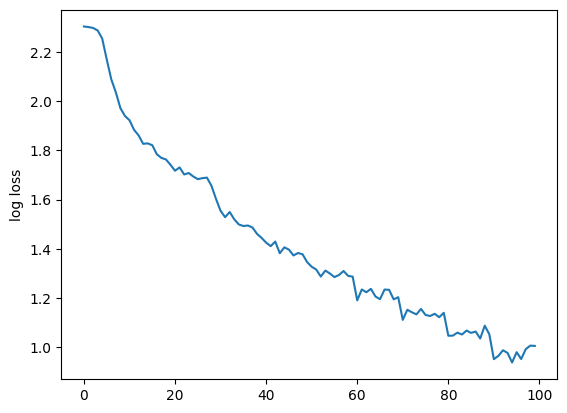

In [5]:
plt.plot(conv_losses);
plt.ylabel('log loss');

In [6]:
print(f'Baseline accuracy of the convolutional model is {test_conv(ConvNet)*100} %')

Files already downloaded and verified
Baseline accuracy of the convolutional model is 57.220000000000006 %


## Momentum Contrast

### Pre-Training the Encoder

In [7]:
encoder_args = TrainArgs(epochs = 20)

In [8]:
encoder, enc_losses = train_encoder(encoder_args)

Files already downloaded and verified
Files already downloaded and verified
Train Epoch: 1 	Loss: 0.004958
Train Epoch: 2 	Loss: 0.000978
Train Epoch: 3 	Loss: 0.000349
Train Epoch: 4 	Loss: 0.000193
Train Epoch: 5 	Loss: 0.000133
Train Epoch: 6 	Loss: 0.000107
Train Epoch: 7 	Loss: 0.000090
Train Epoch: 8 	Loss: 0.000089
Train Epoch: 9 	Loss: 0.000084
Train Epoch: 10 	Loss: 0.000077
Train Epoch: 11 	Loss: 0.000074
Train Epoch: 12 	Loss: 0.000070
Train Epoch: 13 	Loss: 0.000063
Train Epoch: 14 	Loss: 0.000062
Train Epoch: 15 	Loss: 0.000061
Train Epoch: 16 	Loss: 0.000059
Train Epoch: 17 	Loss: 0.000064
Train Epoch: 18 	Loss: 0.000056
Train Epoch: 19 	Loss: 0.000053
Train Epoch: 20 	Loss: 0.000058


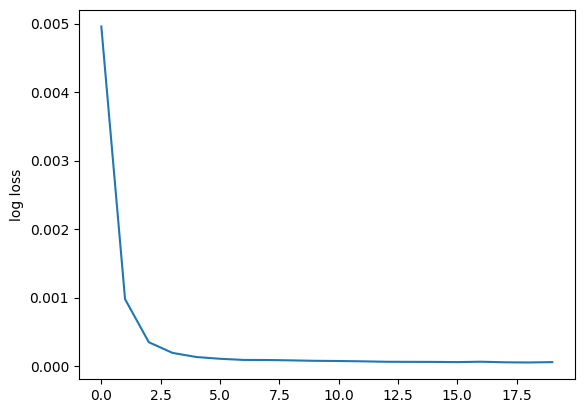

In [9]:
plt.plot(enc_losses);
plt.ylabel('log loss');

### Visualizing Embeddings

To do:
1. Implement multiple training ratios
2. Hyperparameter tuning?
3. Plot the loss functions

In [10]:
data, targets = encode_data()

Files already downloaded and verified


100%|██████████| 10000/10000 [02:57<00:00, 56.42it/s]


In [11]:
ret = TSNE(n_components=2, random_state=0, n_jobs=8).fit_transform(data)

Files already downloaded and verified


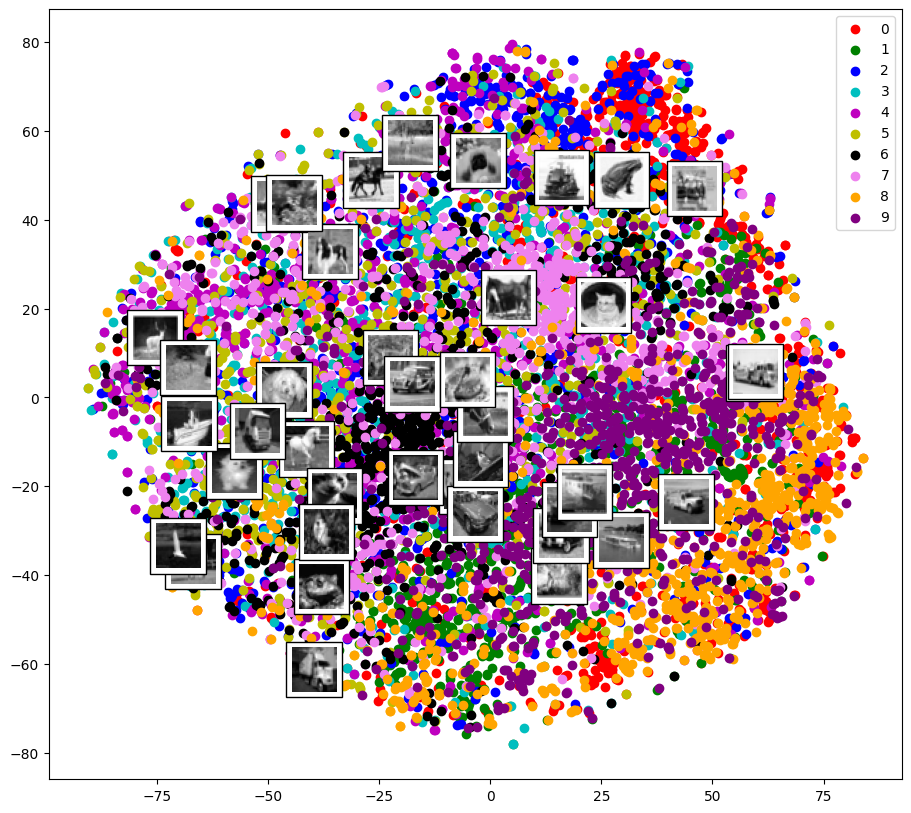

In [12]:
plot_tsne(targets, ret)

### Training SVM on freezed features

In [13]:
X_train, y_train = encode_data(train=True)
X_test, y_test = encode_data(train=False)

Files already downloaded and verified


100%|██████████| 50000/50000 [14:54<00:00, 55.87it/s]


Files already downloaded and verified


100%|██████████| 10000/10000 [02:55<00:00, 57.08it/s]


In [14]:
svm = SVC(C = 100,  gamma='scale')
svm.fit(X_train, y_train)

SVC(C=100)

In [15]:
svm.score(X_test, y_test)

0.5942

### Multiple Runs

In [16]:
# subsample so things run faster
X_train, y_train = encode_data(train=True, subsample = True)
X_test, y_test = encode_data(train=False, subsample = True)

Files already downloaded and verified


100%|██████████| 5000/5000 [01:29<00:00, 55.74it/s]


Files already downloaded and verified


100%|██████████| 1000/1000 [00:17<00:00, 56.35it/s]


In [17]:
conv_args = TrainArgs(batchsize = 10, epochs = 5)

In [18]:
n = 3
conv_errors = []
svm_errors = []
for i in range(n):
    ConvNet, conv_losses = train_ConvNet(conv_args, subsample=True)
    conv_errors.append(test_conv(ConvNet, subsample=True)*100)
    
    svm = SVC(C = 100,  gamma='scale')
    svm.fit(X_train, y_train)   
    svm_errors.append(svm.score(X_test, y_test))

Files already downloaded and verified
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.301
[epoch: 1, i:   499] avg mini-batch loss: 2.292
[epoch: 2, i:   499] avg mini-batch loss: 2.253
[epoch: 3, i:   499] avg mini-batch loss: 2.172
[epoch: 4, i:   499] avg mini-batch loss: 2.092
Files already downloaded and verified
Files already downloaded and verified
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.302
[epoch: 1, i:   499] avg mini-batch loss: 2.299
[epoch: 2, i:   499] avg mini-batch loss: 2.292
[epoch: 3, i:   499] avg mini-batch loss: 2.274
[epoch: 4, i:   499] avg mini-batch loss: 2.214
Files already downloaded and verified
Files already downloaded and verified
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.302
[epoch: 1, i:   499] avg mini-batch loss: 2.300
[epoch: 2, i:   499] avg mini-batch loss: 2.296
[epoch: 3, i:   499] avg mini-batch loss: 2.286
[epoch: 4, i:   499] avg mini-batch loss: 2.238
Files already downloaded and verified


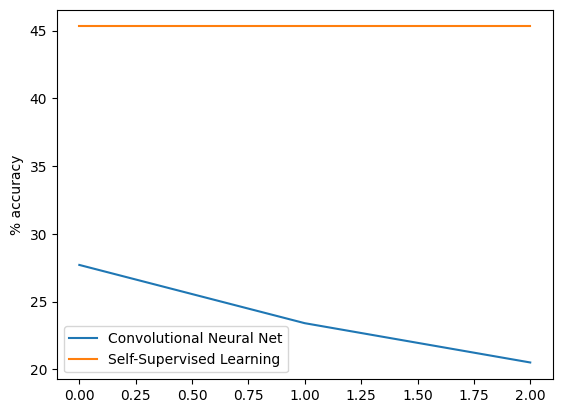

In [19]:
plt.plot(np.array(conv_errors), label="Convolutional Neural Net")
plt.plot(np.array(svm_errors)*100, label="Self-Supervised Learning")
plt.legend()
plt.ylabel('% accuracy')
plt.savefig('./results/comparison.png')

In [20]:
conv_errors

[27.700000000000003, 23.400000000000002, 20.5]

In [21]:
svm_errors

[0.453, 0.453, 0.453]

In [22]:
conv_errors

[27.700000000000003, 23.400000000000002, 20.5]